<a href="https://colab.research.google.com/github/Glorc12/30.11.2023-/blob/main/c%D1%82%D1%80%D0%B5%D1%81%D1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# 2 строчка получение доступа к гугл диску 3.установка обьектов из диска
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import files

with open('StressLevelDataset.csv', 'w') as f:
  f.write('some content')

files.download('StressLevelDataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/StressLevelDataset.csv').drop_duplicates()

columns = (' anxiety_level self_esteem mental_health_history depression headache blood_pressure sleep_quality breathing_problem noise_level living_conditions safety  basic_needs academic_performance study_load	teacher_student_relationship future_career_concerns social_support peer_pressure extracurricular_activities bullying  stress_level ')  #колонки
df.columns = columns.split()

In [ ]:
df.head(1100)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


In [ ]:
df.info(100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [ ]:
df.dtypes

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object

In [ ]:
#Алгоритмы не могут работать с текстовыми данными без предварительной конвертации в числовой формат.
#Работа с категориальными признаками может быть устроена по разному.
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df): #init_df начальные данные из файла
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {} # кодирование
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки
encoded_data.head()

<ipython-input-20-6c1548ecdec6>:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


# Описательная статистика


1.Сколько учащихся в наборе данных?

In [ ]:
print('Количество учащихся в наборе данных:', len(df)) # len(df) - определяет размер строки

Количество учащихся в наборе данных: 1100


2.Каков средний уровень тревожности учащихся в наборе данных?

In [ ]:
print('Средний уровень тревожности учащихся в наборе данных:', df['anxiety_level'].mean())

Средний уровень тревожности учащихся в наборе данных: 11.063636363636364


3.Сколько учащихся сообщили о проблемах с психическим здоровьем?

In [ ]:
mhh = df[df['mental_health_history']==1] #в переменной только единицы (т.е. считаются те, кто сообщили)
print('О проблемах с психическим здоровьем сообщило', len(mhh), 'учащихся')

О проблемах с психическим здоровьем сообщило 542 учащихся


# Психологические факторы

1.У скольких учащихся уровень самооценки ниже среднего?

In [ ]:
mse = df['self_esteem'].mean() #среднее значение по колонке с самооценкой
df_se_f = df[df['self_esteem'] < mse] #значения, которые меньше среднего
df_se_f.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
5,20,13,1,21,3,3,1,4,3,2,...,1,2,5,2,5,1,4,4,5,2
7,17,3,1,22,4,3,1,5,3,1,...,1,1,3,2,4,1,4,4,5,2
9,6,8,0,27,4,3,1,2,0,5,...,2,2,2,1,5,1,5,3,4,1


In [ ]:
print('У', len(df_se_f), 'учащихся самооценка ниже среднего')

У 507 учащихся самооценка ниже среднего


2.Какой процент учащихся сообщил о возникновении депрессии?

In [ ]:
de = df['depression'] #кол-во учащихся всего (по столбику с депрессией)
#print(min(de)) = 0, мин. значение по столбцу
#print(max(de)) = 27, макс. значение

In [ ]:
df_de = df[df['depression'] > 0] #выводит тех, у кого значение по столбцу больше нуля

In [ ]:
de_ttt = len(df_de)/len(de)*100  #сам процент(?)
print('О возникновении депрессии сообщили', de_ttt, '% учащихся от количества всех опрошенных')

О возникновении депрессии сообщили 96.0 % учащихся от количества всех опрошенных


# Физиологические факторы

1.Сколько студентов часто испытывают головные боли?

In [ ]:
headd = df['headache']
print(min(headd))  #макс. и мин. значения (типо как шкала баллов??)
print(max(headd))

0
5


In [ ]:
df_headd = df[df['headache'] > 3] #от 4ёх до 5-ти, тк спрашивается про частое(!) появление головных болей
print(len(df_headd), 'студентов часто испытывают частые головные боли')

269 студентов часто испытывают частые головные боли


2.Каково среднее значение артериального давления среди студентов?

In [ ]:
print('Среднее значение артериального давления среди студентов:', df['blood_pressure'].mean())

Среднее значение артериального давления среди студентов: 2.1818181818181817


3.Сколько студентов оценивают качество своего сна как плохое?

In [ ]:
sleep = df['sleep_quality']
print(min(sleep))  #макс. и мин. значения
print(max(sleep))

0
5


In [ ]:
df_sleep = df[df['sleep_quality'] <3] #медиана 2.5, пусть 2 тоже плохо будет
#df_sleep = df[df['sleep_quality'] <2] - 362 студента
print(len(df_sleep), 'студентов оценивают качество своего сна как плохое')

550 студентов оценивают качество своего сна как плохое


# Факторы окружающей среды

1.Сколько студентов живут в условиях с высоким уровнем шума

In [ ]:
noise = df['noise_level']
print(min(noise))  #макс. и мин. значения
print(max(noise))

0
5


In [ ]:
df_noise = df[df['noise_level'] >3] #пусть высокий уровень шума будет от 4ёх до 5ти
print(len(df_noise), 'студентов живут в условиях с высоким уровнем шума')

274 студентов живут в условиях с высоким уровнем шума


2.Какой процент студентов чувствует себя небезопасно в условиях своей жизни?

In [ ]:
lc = df['living_conditions'] #мин. макс.
print(min(lc))
print(max(lc))

0
5


In [ ]:
df_lc = df[df['living_conditions'] <3] #значения от 0 до 2ёх включительно
llcc = len(df_lc)/len(df)*100  #сам процент
print(llcc, '% чувствуют себя небезопасно в условиях своей жизни')

50.090909090909086 % чувствуют себя небезопасно в условиях своей жизни


3.Сколько учащихся сообщили о том, что их основные потребности не были удовлетворены?

In [ ]:
bn = df['basic_needs']
print(min(bn))  #мин и макс знач
print(max(bn))

0
5


In [ ]:
df_bn = df[df['basic_needs'] <3] #не были удовлетворены, от нуля до 2ух вкл.
print(len(df_bn), 'учащихся сообщили о том, что их основные потребности не были удовлетворены')

548 учащихся сообщили о том, что их основные потребности не были удовлетворены


# Академические факторы

1.Сколько студентов оценивают свою успеваемость как ниже среднего?

In [ ]:
ad = df['academic_performance'].mean() #среднее значение по колонке
df_ad = df[df['academic_performance'] < ad] #значения, которые меньше среднего
print(len(df_ad), 'студентов оценивают свою успеваемость ниже среднего')

561 студентов оценивают свою успеваемость ниже среднего


2.Какова средняя учебная нагрузка, о которой сообщают студенты?

In [ ]:
sl = df['study_load'].mean() #среднее значение по колонке
print('Средняя учебная нагрузка: ', sl)

Средняя учебная нагрузка:  2.6218181818181816


3.Сколько студентов обеспокоены своей будущей карьерой?

In [ ]:
fcc = df['future_career_concerns']
print(min(fcc))  #макс. и мин. значения
print(max(fcc))

0
5


In [ ]:
df_fcc = df[df['future_career_concerns'] > 3] #от 4ёх до 5ти
print(len(df_fcc), 'студентов обеспокоены своей будущей карьерой')

371 студентов обеспокоены своей будущей карьерой


# Социальныем факторы

1. Сколько учащихся чувствуют, что у них есть сильная социальная поддержка?

In [ ]:
ss = df['social_support']
print(min(ss))  #макс. и мин. значения
print(max(ss))

0
3


In [ ]:
df_ss = df[df['social_support'] == 3] #сильная соц поддерджка. 3 балла(?) по шкале
print(len(df_ss), 'учащихся чувствуют, что у них есть сильная соц. поддержка')

458 учащихся чувствуют, что у них есть сильная соц. поддержка


2.Какой процент учащихся подвергался травле?

In [ ]:
bull = df['bullying'] #мин., макс.
print(min(bull))
print(max(bull))

0
5


In [ ]:
df_bull = df[df['bullying'] >2] #значения от 3х
bullying = len(df_bull)/len(df)*100
print(bullying, '% учащихся подвергались травле')

50.81818181818182 % учащихся подвергались травле


3.Сколько учащихся участвуют во внеклассных мероприятиях?

In [ ]:
ea = df['extracurricular_activities'] #min., мax.
print(min(ea))
print(max(ea))

0
5


In [ ]:
df_ea = df[df['extracurricular_activities'] > 0]
print(len(df_ea), 'учащихся участвуют во внеклассных мероприятиях')

1066 учащихся участвуют во внеклассных мероприятиях


# Сравнительный анализ

1.Существует ли корреляция между уровнем тревожности и успеваемостью?

In [ ]:

df_al_ap = df.drop(['self_esteem',	'mental_health_history',	'depression',	'headache',	'blood_pressure',	'sleep_quality',	'breathing_problem',	'noise_level',	'living_conditions',	'safety',	'basic_needs',	'study_load',	'teacher_student_relationship',	'future_career_concerns',	'social_support',	'peer_pressure',	'extracurricular_activities',	'bullying', 'stress_level'], axis=1)
df_al_ap

,anxiety_level,academic_performance
0,14,3
1,15,1
2,12,2
3,16,2
4,16,4
...,...,...
1095,11,2
1096,9,0
1097,4,5
1098,21,2


<Axes: >

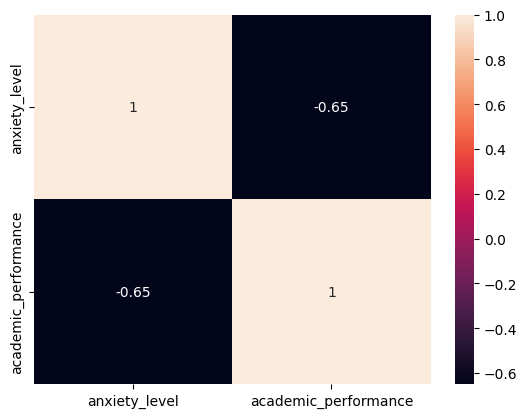

In [ ]:
corr_matrix = df_al_ap.corr()
sns.heatmap(corr_matrix, annot=True, )

<Axes: xlabel='academic_performance', ylabel='anxiety_level'>

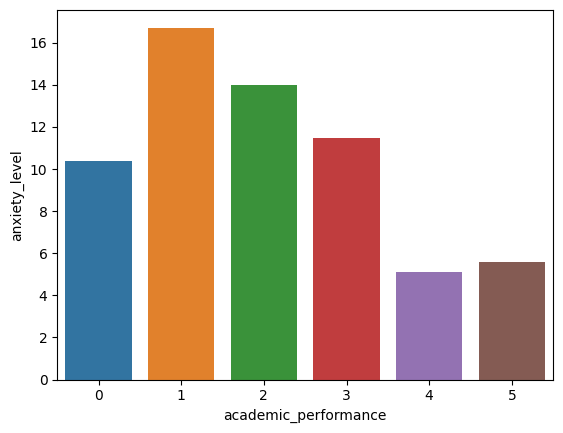

In [ ]:
sns.barplot(x ='academic_performance', y = 'anxiety_level', data = df_al_ap, errorbar = None)
#график зависимости успеваемости от уровня тревожности

1.Сообщают ли учащиеся с плохим качеством сна о более высоком уровне депрессии?

In [ ]:
df_sq_de = df.drop(['anxiety_level', 'self_esteem',	'mental_health_history',	'headache',	'blood_pressure',	'breathing_problem',	'noise_level',	'living_conditions',	'safety',	'basic_needs', 'academic_performance',	'study_load',	'teacher_student_relationship',	'future_career_concerns',	'social_support',	'peer_pressure',	'extracurricular_activities',	'bullying', 'stress_level'], axis=1)
df_sq_de

,depression,sleep_quality
0,11,2
1,15,1
2,14,2
3,15,1
4,7,5
...,...,...
1095,14,3
1096,8,0
1097,3,5
1098,19,1


In [ ]:
mean_de = df_sq_de['depression'].mean()
df_sqde = df_sq_de[df_sq_de['depression'] > mean_de]
df_sqde

,depression,sleep_quality
1,15,1
2,14,2
3,15,1
5,21,1
7,22,1
...,...,...
1090,24,1
1091,25,1
1095,14,3
1098,19,1


<Axes: xlabel='sleep_quality', ylabel='depression'>

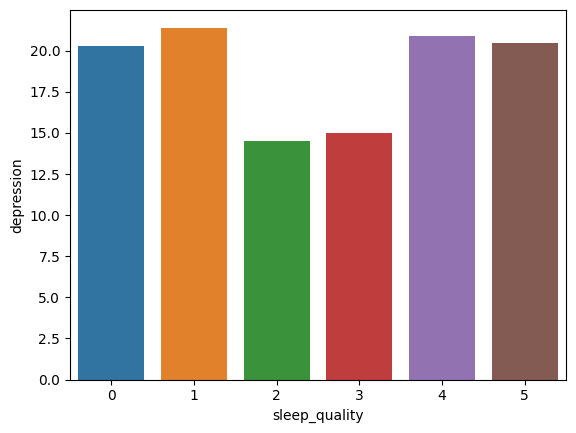

In [ ]:
sns.barplot(x = 'sleep_quality', y = 'depression', data = df_sqde, errorbar = None)
#график зависимости уровня депресии и качества сна

3.Имеют ли учащиеся, подвергшиеся травле (буллингу), больше шансов иметь в анамнезе проблемы со психическим здоровьем?

In [ ]:
df_mhh_bul = df.drop(['anxiety_level', 'self_esteem', 'depression', 'headache',	'blood_pressure',	'sleep_quality', 'breathing_problem',	'noise_level',	'living_conditions',	'safety',	'basic_needs', 'academic_performance',	'study_load',	'teacher_student_relationship',	'future_career_concerns',	'social_support',	'peer_pressure',	'extracurricular_activities',	'stress_level'], axis=1)
df_mhh_bul

,mental_health_history,bullying
0,0,2
1,1,5
2,1,2
3,1,5
4,0,5
...,...,...
1095,0,3
1096,0,3
1097,0,1
1098,1,4


<Axes: xlabel='mental_health_history', ylabel='bullying'>

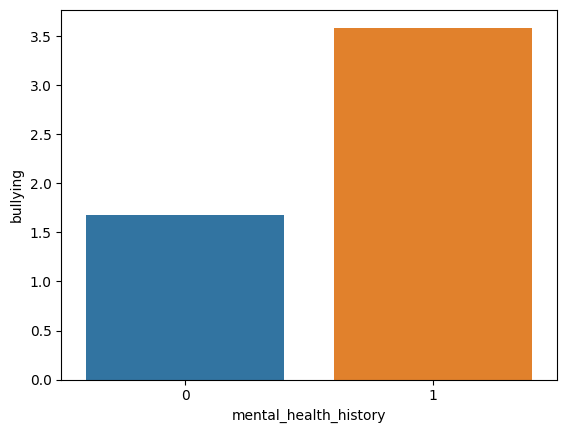

In [ ]:
sns.barplot(x = 'mental_health_history', y = 'bullying', data = df_mhh_bul, errorbar = None)
#график зависимости проблем с псих. здоровьм от наличия буллинга

# Общее исследование

1.Из-за какого фактора наибольшее число студентов сообщают о негативном опыте или состояниях?

<ipython-input-20-6c1548ecdec6>:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать


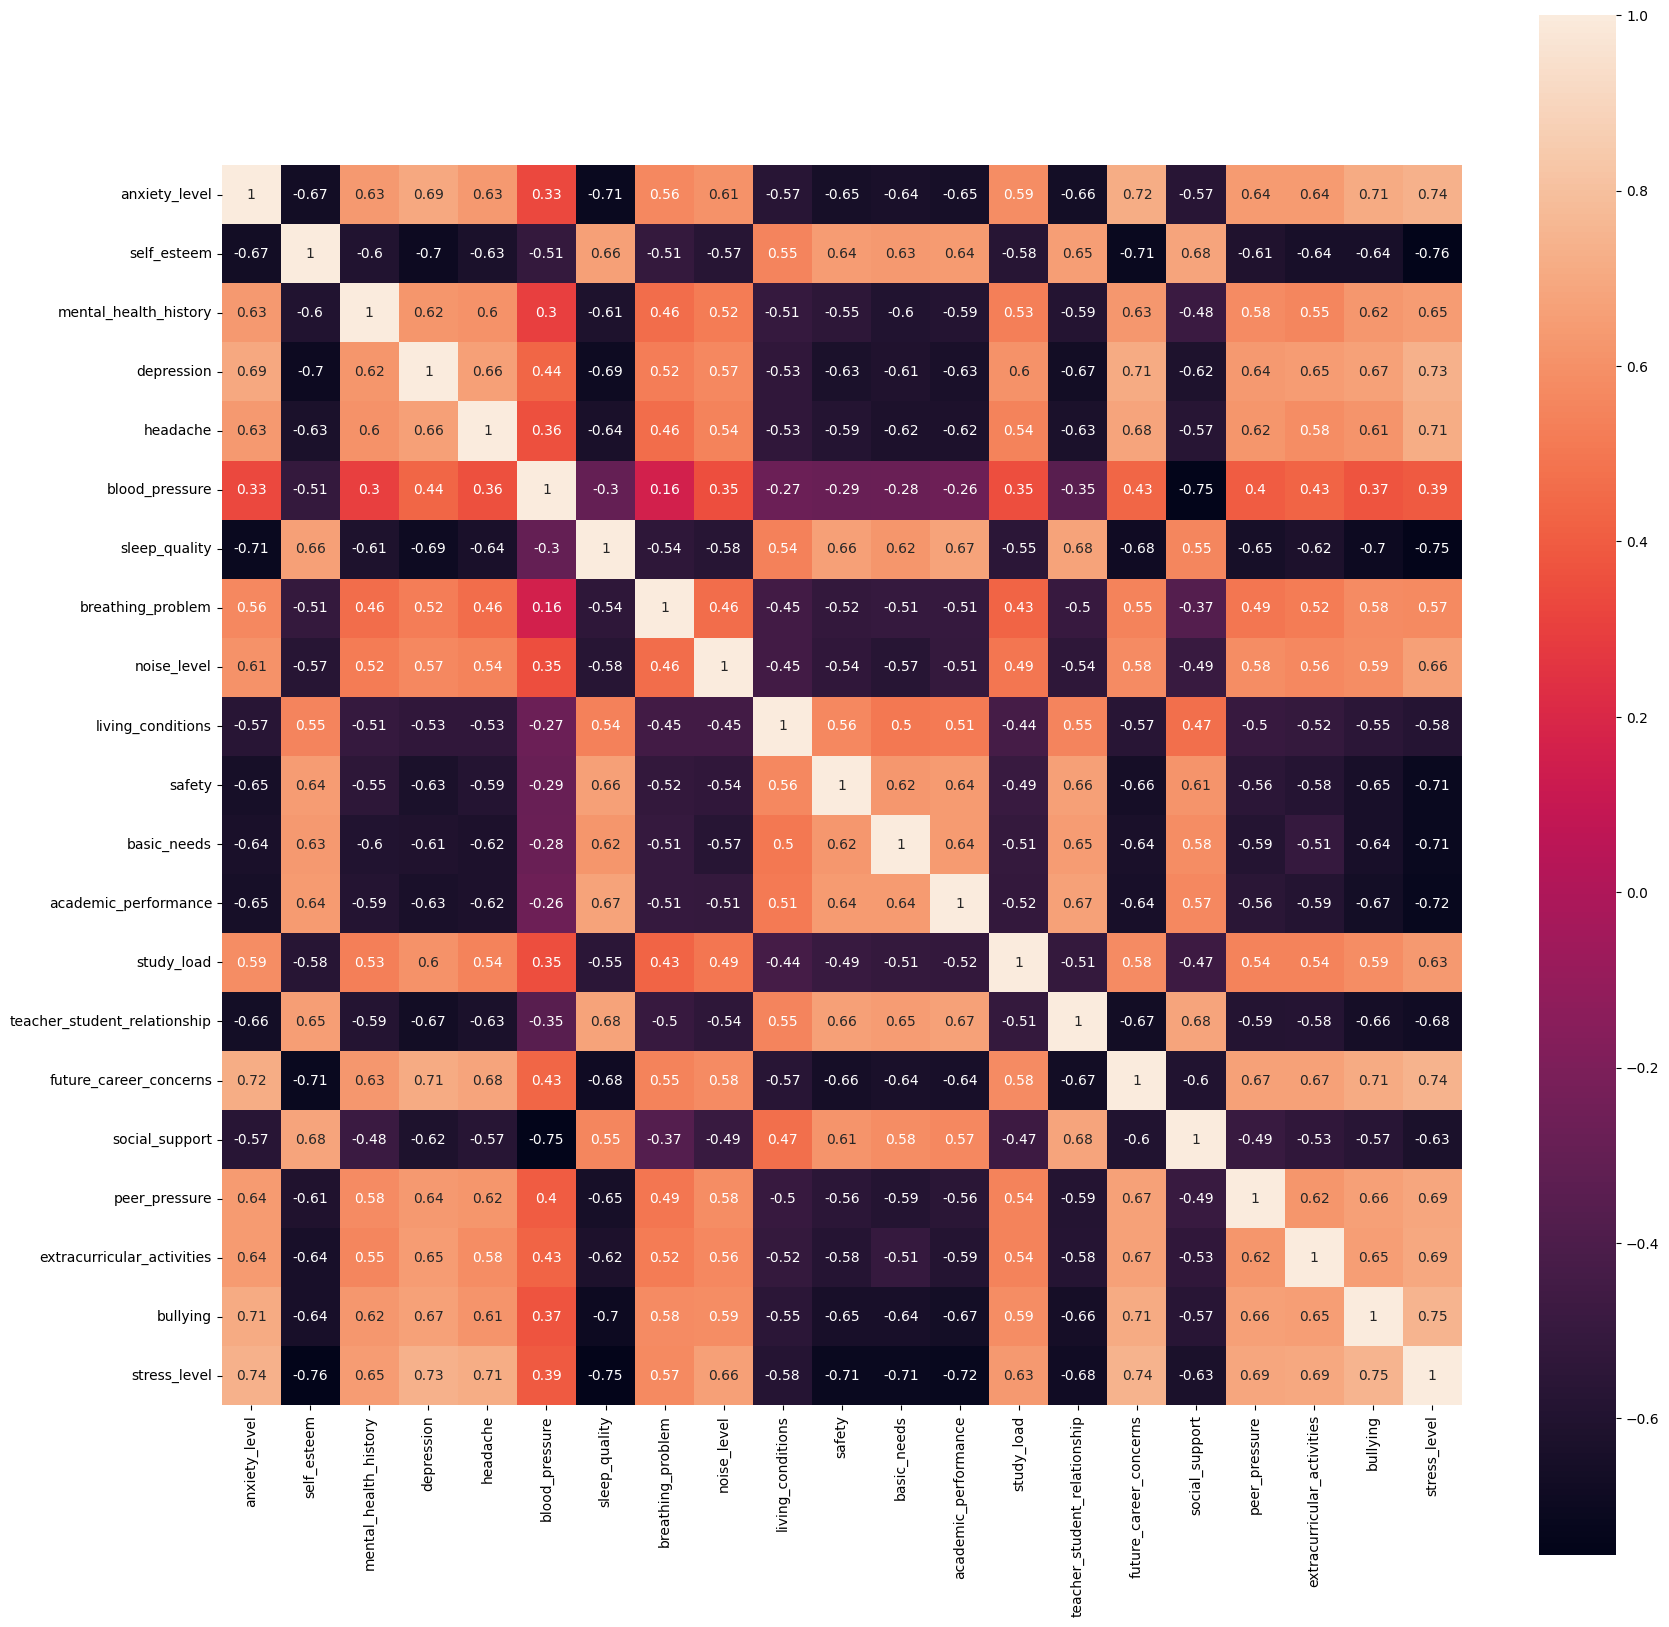

In [ ]:
import seaborn as sns

plt.subplots(figsize=(20,20))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(),annot=True, square=True)
plt.show()

In [ ]:

print("Из-за социального фактора наибольшее число студентов сообщают о негативном опыте или состояниях ,а именно",(bullying),"% учащихся")

Из-за социального фактора наибольшее число студентов сообщают о негативном опыте или состояниях ,а именно 50.81818181818182 % учащихся


2. Существуют ли какие-либо заметные тенденции или закономерности при сравнении различных факторов?